![](https://i.imgur.com/0AUxkXt.png)

# Lab 2 - Pandas & Seaborn

## Import libraries

In [1]:
# Your code here
# Hint: copy from the lecture notebook
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

## Import data

In this Lab we will use a dataset from seaborn library. The dataset contains tips data from different customers females and males, smokers and non smokers, from days, dinner or lunch and from different table size.

In [2]:
# Run this code
tips = sns.load_dataset('tips')


### Overview

**Show the first 3 rows of the data**

In [3]:
# Your code here
tips.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


### Show the last 2 rows of the data

In [4]:
# Your code here
tips.tail(2)

,total_bill,tip,sex,smoker,day,time,size
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


### Show 4 randoms rows

In [5]:
# Your code here
tips.sample(4)

,total_bill,tip,sex,smoker,day,time,size
32,15.06,3.00,Female,No,Sat,Dinner,2
166,20.76,2.24,Male,No,Sun,Dinner,2
121,13.42,1.68,Female,No,Thur,Lunch,2
89,21.16,3.00,Male,No,Thur,Lunch,2


### Print a concise summary of the data

Print information about the data including the index dtype and column dtypes, non-null values and memory usage.

In [6]:
# Your code here
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


### Generate descriptive statistics

A descriptive statistics that summarize the central tendency, dispersion and shape of a dataset's distribution, excluding NaN values.

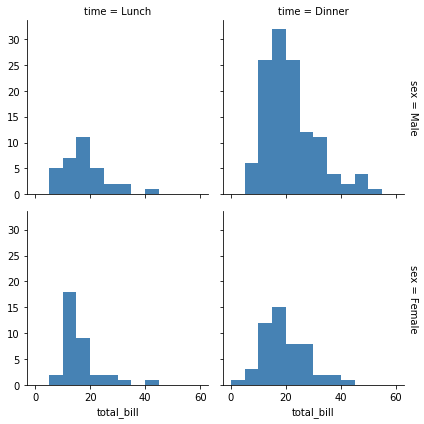

In [7]:
# Your code here
g = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
bins = np.linspace(0, 60, 13)
g.map(plt.hist, "total_bill", color="steelblue", bins=bins)

## EDA - Exploratory Data Analysis

**What is the min/max of tip?**

In [8]:
# Your code here
print(tips["tip"].min())
print(tips["tip"].max())

1.0
10.0


**The restaurant is open on which days of the week?**

*Hint: unique values of the column `day`*

In [9]:
# Your code here
tips["day"].unique()

[Sun, Sat, Thur, Fri]
Categories (4, object): [Sun, Sat, Thur, Fri]

**List of unique values in column `time`**

In [10]:
# Your code here
tips["time"].unique()

[Dinner, Lunch]
Categories (2, object): [Dinner, Lunch]

**What is the range of table size?**

In [11]:
# Your code here
tips.shape

(244, 7)

**How many man/woman paid for the dish?**


In [12]:
# Your code here
print("Male: ",tips[tips["sex"] == "Male"]["sex"].count())
print("Female: ",tips[tips["sex"] == "Female"]["sex"].count())

Male:  157
Female:  87


**What is the percentage of smoker table and their revenue?**

In [26]:
# Your code here
smokers = tips[tips["smoker"] == "Yes"]
smokers_revenue = smokers["total_bill"].sum()

print(f"{len(smokers)} smoking tatable with revenue ${smokers_revenue}")

print("Percentage: {}".format(smokers_revenue / tips["total_bill"].sum()))



93 smoking tatable with revenue $1930.3400000000001
Percentage: 0.3998409203421041


**List 3 tables that have the most expensive bill**

In [14]:
# Your code here
tips["total_bill"].sort_values(ascending=False).head(3)

170    50.81
212    48.33
59     48.27
Name: total_bill, dtype: float64

### Group by - Example

**What is the best day to work - maximum tips (sum and percents)?**

In [15]:
tips2 = tips.groupby('day').sum()
tips2['percent'] = tips2['tip'] / tips2['total_bill'] * 100
tips2

,total_bill,tip,size,percent
day,,,,
Thur,1096.33,171.83,152,15.673201
Fri,325.88,51.96,40,15.944519
Sat,1778.40,260.40,219,14.642375
Sun,1627.16,247.39,216,15.203791


**Your turn: Who eats more (and tips more)? smokers or non smokers?**

In [16]:
# Your code here
tips2 = tips.groupby("smoker").sum()
smoking = len(tips[tips["smoker"]=="Yes"]) / tips["total_bill"].sum()
non_smoking = len(tips[tips["smoker"]=="No"]) / tips["total_bill"].sum()
tips2["average"] = [smoking, non_smoking]
tips2


,total_bill,tip,size,average
smoker,,,,
Yes,1930.34,279.81,224,0.019264
No,2897.43,451.77,403,0.031277


### Data Visualization using Seaborn

**Visualize # of tables per day**

*Hint: using the seaborn's function **countplot()** with `x=day` and `data=tips`*

In [ ]:
# Your code here
sns.countplot(x="day", data=tips)

**Visualize # of smoker and non-smoker tables**

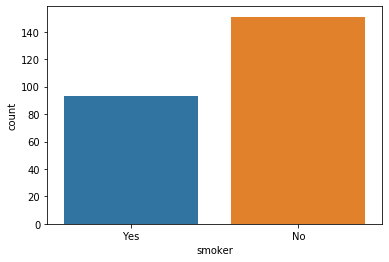

In [18]:
# Your code here
sns.countplot(x="smoker", data=tips)

**Visualize # of male/female customers who pay**

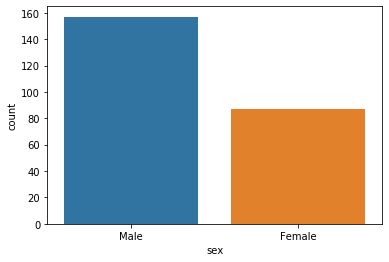

In [19]:
# Your code here
sns.countplot(x="sex", data=tips)

**Analyze the distribution of payments of male and female in different days**

*Hint: countplot with `hue='sex'`*

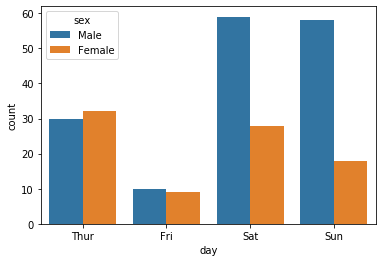

In [20]:
# Your code here
sns.countplot(x="day", hue="sex", data=tips)

**Analyze the # of tables in different time (lunch or dinner) and days**

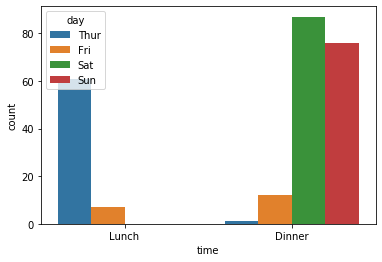

In [21]:
# Your code here
sns.countplot(x="time", hue="day", data=tips)

**Example: Visualize the distribution of the total bill**


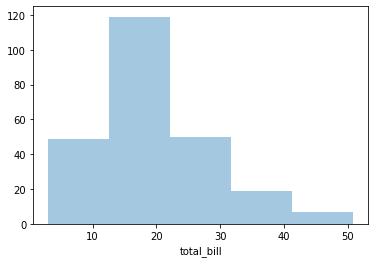

In [22]:
sns.distplot(tips['total_bill'], bins=5, hist=True, kde=False)

**Visualize the distribution of the tip**

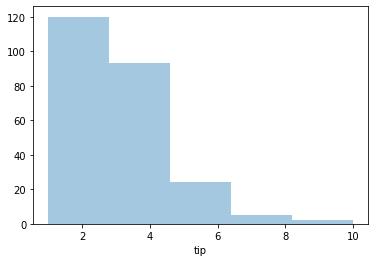

In [34]:
# Your code here
sns.distplot(tips["tip"], bins=5, hist=True, kde=False)

**Example: Scatter plot of tip and total bill**

In [ ]:
sns.jointplot(x='tip', y='total_bill', data=tips)

**Add one more parameter `kind='hex'` to the previous   `jointplot()` function**

In [ ]:
# Your code here
sns.jointplot(x='tip', y='total_bill', data=tips, kind="hex")

**Let's try with `kind='kde'` (KDE - Kernel Density Estimation)**

In [ ]:
# Your code here
sns.jointplot(x='tip', y='total_bill', data=tips, kind="kde")

**Analyze the relationship between `size` and `tip`**

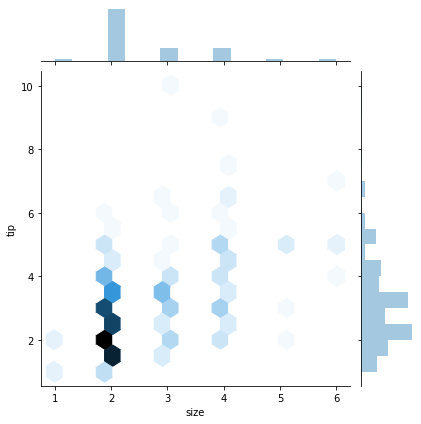

In [41]:
# Your code here
sns.jointplot(x="size", y="tip", data=tips, kind="hex")

**Correlation Matrix**

Show the correlation matrix and comfirm the analytics you have from previous steps.

In [ ]:
# Your code here
plt.figure(figsi)

**Box plot, Swarm plot and Violin plot**

![](https://i.imgur.com/5Lo17qp.png)

**Implement the seaborn's function `boxplot()` with params: `x='sex'`, `y='total_bill'` and `data=tips`**

In [ ]:
# Your code here

**Implement `boxplot()` with params: `x='sex'`, `y='total_bill'` and `data=tips`**

In [ ]:
# Your code here

**Add `hue='smoker'` to the previous `boxplot()`**

In [ ]:
# Your code here

**Implement `swarmplot()` with: `x='day', y='tip', hue='smoker', data=tips`**

In [ ]:
# Your code here

**Implement previous chart with `violinplot()`**

In [ ]:
# Your code here

### Bonus

**Total revenue per day**

In [ ]:
tips.groupby('day').sum()['total_bill'].plot(kind='bar')

**Pie chart of table size in percentage**

In [ ]:
# Pie chart
labels = []
sizes = []
explode = []

labels = tips['size'].value_counts().index.sort_values()
for index, size in enumerate(labels):
    sizes.append(size)
    if size==3:
        explode.append(0.2)
    else:
        explode.append(0)
f, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

In [ ]:
for i , v in tips['size'].value_counts().iteritems():
    print(i)

## Great Job!!